<a href="https://colab.research.google.com/github/allineBrito/eleicoesBR/blob/main/Censo_Superior_IES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np


low_memory = False


In [5]:
Cursos = pd.read_csv('/content/drive/MyDrive/Pasta sem nome/superiorcursos21.csv', sep=";", encoding='ISO-8859-1')
IES = pd.read_csv('/content/drive/MyDrive/Pasta sem nome/supeiror2020IES.csv', encoding='ISO-8859-15', sep = ';')

# ***INFORMAÇÕES SOBRE AS INSTITUIÇÕES DE ENSINO***

In [6]:
ies = IES['CO_IES'].nunique()
print(f'Total de IES no Brasil: {ies}')

Total de IES no Brasil: 2457


In [7]:
uf_ies = IES.copy()[['CO_IES', 'SG_IES', 'NU_ANO_CENSO']]
uf_ies

,CO_IES,SG_IES,NU_ANO_CENSO
0,1,UFMT,2020
1,2,UNB,2020
2,3,UFS,2020
3,4,UFAM,2020
4,5,UFPI,2020
...,...,...,...
2452,25274,UFCAT,2020
2453,25275,UFAPE,2020
2454,25277,UFDPAR,2020
2455,25282,UFJ,2020


In [18]:
cod_curso = Cursos.copy()[['NU_ANO_CENSO' ,'CO_IES', 'SG_UF', 'NO_REGIAO', 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_REDE', 'TP_MODALIDADE_ENSINO', 'QT_MAT', 'QT_MAT_AMARELA', 'QT_MAT_BRANCA', 'QT_MAT_CORND', 
                           'QT_MAT_INDIGENA', 'QT_MAT_PARDA', 'QT_MAT_PRETA', 'QT_VG_TOTAL', 'QT_ING']]
cod_curso

,NU_ANO_CENSO,CO_IES,SG_UF,NO_REGIAO,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,TP_MODALIDADE_ENSINO,QT_MAT,QT_MAT_AMARELA,QT_MAT_BRANCA,QT_MAT_CORND,QT_MAT_INDIGENA,QT_MAT_PARDA,QT_MAT_PRETA,QT_VG_TOTAL,QT_ING
0,2020,1,MT,Centro-Oeste,1,1,2,38,2,9,0,1,22,4,0,0
1,2020,1,MT,Centro-Oeste,1,1,2,28,1,9,1,0,13,4,0,14
2,2020,1,MT,Centro-Oeste,1,1,2,34,0,12,0,0,20,2,0,0
3,2020,1,MT,Centro-Oeste,1,1,2,22,0,11,0,0,9,2,0,0
4,2020,1,MT,Centro-Oeste,1,1,2,33,0,6,0,0,20,7,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335624,2020,25352,MT,Centro-Oeste,1,1,1,378,5,175,3,0,174,21,86,40
335625,2020,25352,MT,Centro-Oeste,1,1,1,341,3,142,1,1,151,43,96,63
335626,2020,25352,MT,Centro-Oeste,1,1,1,279,4,106,2,1,139,27,68,55
335627,2020,25352,MT,Centro-Oeste,1,1,1,205,3,98,1,2,89,12,45,46


In [9]:
brancos = cod_curso['QT_MAT_BRANCA'].sum()
pretos = cod_curso['QT_MAT_PRETA'].sum()
pardos = cod_curso['QT_MAT_PARDA'].sum()
idígenas = cod_curso['QT_MAT_INDIGENA'].sum()
nda = cod_curso['QT_MAT_CORND'].sum()
total = cod_curso['QT_MAT'].sum()
print(f'Total de alunos brancos inscritos em algum curso de IES: {brancos}')
print(f'Total de alunos pretos inscritos em algum curso de IES: {pretos}')
print(f'Total de alunos pardos inscritos em algum curso de IES: {pardos}')
print(f'Total de alunos indígenas inscritos em algum curso de IES: {idígenas}')
print(f'Total de alunos Não declarado inscritos em algum curso de IES: {nda}')

print(f' A média total de aluno por IES é de {int(total/ies)}')

Total de alunos brancos inscritos em algum curso de IES: 3684058
Total de alunos pretos inscritos em algum curso de IES: 617348
Total de alunos pardos inscritos em algum curso de IES: 2648367
Total de alunos indígenas inscritos em algum curso de IES: 47267
Total de alunos Não declarado inscritos em algum curso de IES: 1540985
 A média total de aluno por IES é de 3533


In [10]:
# Juntando os dados de cursos e IES
df = cod_curso.merge(uf_ies, how='left', left_on='CO_IES', right_on='CO_IES')
df

,NU_ANO_CENSO_x,CO_IES,SG_UF,NO_REGIAO,TP_CATEGORIA_ADMINISTRATIVA,TP_REDE,TP_MODALIDADE_ENSINO,QT_MAT,QT_MAT_AMARELA,QT_MAT_BRANCA,QT_MAT_CORND,QT_MAT_INDIGENA,QT_MAT_PARDA,QT_MAT_PRETA,SG_IES,NU_ANO_CENSO_y
0,2020,1,MT,Centro-Oeste,1,1,2,38,2,9,0,1,22,4,UFMT,2020
1,2020,1,MT,Centro-Oeste,1,1,2,28,1,9,1,0,13,4,UFMT,2020
2,2020,1,MT,Centro-Oeste,1,1,2,34,0,12,0,0,20,2,UFMT,2020
3,2020,1,MT,Centro-Oeste,1,1,2,22,0,11,0,0,9,2,UFMT,2020
4,2020,1,MT,Centro-Oeste,1,1,2,33,0,6,0,0,20,7,UFMT,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335624,2020,25352,MT,Centro-Oeste,1,1,1,378,5,175,3,0,174,21,UFR,2020
335625,2020,25352,MT,Centro-Oeste,1,1,1,341,3,142,1,1,151,43,UFR,2020
335626,2020,25352,MT,Centro-Oeste,1,1,1,279,4,106,2,1,139,27,UFR,2020
335627,2020,25352,MT,Centro-Oeste,1,1,1,205,3,98,1,2,89,12,UFR,2020


In [11]:
alunos= pd.pivot_table(data=df, values='QT_MAT', aggfunc='sum', columns='SG_IES').transpose()
alunos.sort_values('QT_MAT', ascending=False, inplace=True) #ordenar pelo maior número de inscritos
alunos

,QT_MAT
SG_IES,
UNIP,462253
UNIASSELVI,400280
UNESA,365772
UNINTER,200439
UNICESUMAR,199283
...,...
UNI-BAN,0
FABC,0
FACEAT,0


In [12]:
ies2 = IES.copy()[['NO_REGIAO_IES', 'CO_IES', 'SG_UF_IES', 'SG_IES', 'TP_CATEGORIA_ADMINISTRATIVA']]
ies2

,NO_REGIAO_IES,CO_IES,SG_UF_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,Centro-Oeste,1,MT,UFMT,1
1,Centro-Oeste,2,DF,UNB,1
2,Nordeste,3,SE,UFS,1
3,Norte,4,AM,UFAM,1
4,Nordeste,5,PI,UFPI,1
...,...,...,...,...,...
2452,Centro-Oeste,25274,GO,UFCAT,1
2453,Nordeste,25275,PE,UFAPE,1
2454,Nordeste,25277,PI,UFDPAR,1
2455,Centro-Oeste,25282,GO,UFJ,1


In [13]:
def get_admin_cat(id):
    if id <= 4:
        return 'Publica'
    else:
        return 'Privada'
        
ies2['TP_CATEGORIA_ADMINISTRATIVA'] = ies2['TP_CATEGORIA_ADMINISTRATIVA'].apply(get_admin_cat)
ies2

,NO_REGIAO_IES,CO_IES,SG_UF_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
0,Centro-Oeste,1,MT,UFMT,Publica
1,Centro-Oeste,2,DF,UNB,Publica
2,Nordeste,3,SE,UFS,Publica
3,Norte,4,AM,UFAM,Publica
4,Nordeste,5,PI,UFPI,Publica
...,...,...,...,...,...
2452,Centro-Oeste,25274,GO,UFCAT,Publica
2453,Nordeste,25275,PE,UFAPE,Publica
2454,Nordeste,25277,PI,UFDPAR,Publica
2455,Centro-Oeste,25282,GO,UFJ,Publica


In [14]:
pd.pivot_table(data=ies2, values='SG_IES', aggfunc='count', columns=['NO_REGIAO_IES', 'TP_CATEGORIA_ADMINISTRATIVA']).transpose()

SG_IES
NO_REGIAO_IES TP_CATEGORIA_ADMINISTRATIVA        
Centro-Oeste  Privada                          66
              Publica                         158
Nordeste      Privada                         113
              Publica                         347
Norte         Privada                          39
              Publica                         118
Sudeste       Privada                         404
              Publica                         497
Sul           Privada                         120
              Publica                         184

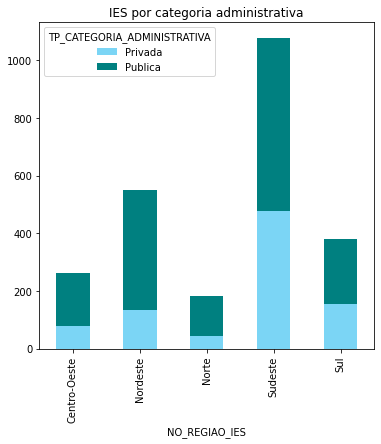

In [30]:
grafico_cor = ['#7BD5F5', '#008080']

ies2.groupby('NO_REGIAO_IES')['TP_CATEGORIA_ADMINISTRATIVA'].value_counts().unstack().plot(kind='bar', stacked=True, color=grafico_cor);
# plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (6,6);
plt.title('IES por categoria administrativa');